In [23]:
from functions import *

In [24]:
data = pd.read_csv('ChiTrafCrash', low_memory=False)
people = pd.read_csv('ChiPeopCrash', low_memory=False)

#merge two datasets on the column CRASH_RECORD_ID
all_df = pd.merge(data, people, on='CRASH_RECORD_ID')
all_df.head()

,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,IMPROPER BACKING,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,FAILED TO YIELD,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


Our Chicago Traffic Accidents datasets came from the city of Chicago’s data portal. We combined two datasets, one that was referenced by the vehicle while the other regarded the person(s) involved in the accident. The information contained is derived from all reported accidents from 2015 to present day.

In [25]:
drop_cols = ['CRASH_RECORD_ID','RD_NO_x', 'CRASH_DATE_EST_I', 'BEAT_OF_OCCURRENCE', 'DATE_POLICE_NOTIFIED', 
             'REPORT_TYPE', 'DAMAGE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'MOST_SEVERE_INJURY', 
             'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 
             'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'ALIGNMENT', 
             'DEVICE_CONDITION', 'STREET_NO', 'STREET_DIRECTION', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 
             'LANE_CNT', 'PERSON_ID', 'VEHICLE_ID', 'CRASH_DATE_y', 'CITY', 'STATE', 'ZIPCODE', 'LATITUDE', 
             'LONGITUDE', 'RD_NO_y', 'DRIVERS_LICENSE_STATE', 'AIRBAG_DEPLOYED', 'EJECTION', 'HOSPITAL', 
             'EMS_AGENCY', 'EMS_RUN_NO', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 
             'BAC_RESULT VALUE', 'CELL_PHONE_USE', 'CRASH_DATE_x', 'DOORING_I', 'NOT_RIGHT_OF_WAY_I', 
             'HIT_AND_RUN_I', 'SEC_CONTRIBUTORY_CAUSE', 'WORK_ZONE_I', 'SEAT_NO', 'FIRST_CRASH_TYPE', 
             'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'NUM_UNITS', 'LOCATION', 'BAC_RESULT', 'DRIVER_ACTION', 
             'DRIVER_VISION', 'DRIVERS_LICENSE_CLASS']

all_df.drop(drop_cols, axis=1, inplace=True)

#drop rows where the accident is not from a car driver
all_df.drop(all_df.loc[all_df['PERSON_TYPE'] != 'DRIVER'].index, inplace=True)
#drop column PERSON_TYPE as only needed to determine all records were from car drivers
all_df.drop('PERSON_TYPE', axis=1, inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907222 entries, 0 to 1168861
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   POSTED_SPEED_LIMIT       907222 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE   907222 non-null  object 
 2   WEATHER_CONDITION        907222 non-null  object 
 3   LIGHTING_CONDITION       907222 non-null  object 
 4   ROADWAY_SURFACE_COND     907222 non-null  object 
 5   ROAD_DEFECT              907222 non-null  object 
 6   INTERSECTION_RELATED_I   233916 non-null  object 
 7   PRIM_CONTRIBUTORY_CAUSE  907222 non-null  object 
 8   STREET_NAME              907220 non-null  object 
 9   CRASH_HOUR               907222 non-null  int64  
 10  CRASH_DAY_OF_WEEK        907222 non-null  int64  
 11  CRASH_MONTH              907222 non-null  int64  
 12  SEX                      907125 non-null  object 
 13  AGE                      669308 non-null  float64
 14  SAF

The Crash Record ID, which was present in both datasets, was used to combine the two datasets. Initially, there were over 1.6 million accidents with 79 features for each accident to explore. We chose to concentrate on accidents in which at least one vehicle was a car. As such, records pertaining to cyclists and pedestrians were eliminated. Furthermore, for the features we identified as relevant, any unknown or missing entry for a relevant feature within a record disqualified that record for use. Our models are based on 17 features of roughly 162 thousand accident records.

In [26]:
#list used in the street_acc function to get street names of top 60 busiest streets with 3750 or more accidents
#names = list(all_df.STREET_NAME.value_counts().sort_values()[1518:].index)

#apply functions to appropriate columns
all_df.POSTED_SPEED_LIMIT = all_df.POSTED_SPEED_LIMIT.apply(speed_limit)
all_df.TRAFFIC_CONTROL_DEVICE = all_df.TRAFFIC_CONTROL_DEVICE.apply(traffic_device)
all_df.WEATHER_CONDITION = all_df.WEATHER_CONDITION.apply(weather)
all_df.ROAD_DEFECT = all_df.ROAD_DEFECT.apply(defects)
all_df.CRASH_HOUR = all_df.CRASH_HOUR.apply(time)
all_df.AGE = all_df.AGE.apply(age_range)
all_df.SAFETY_EQUIPMENT = all_df.SAFETY_EQUIPMENT.apply(safety)
all_df.ROADWAY_SURFACE_COND = all_df.ROADWAY_SURFACE_COND.apply(road_surface)
all_df.PHYSICAL_CONDITION = all_df.PHYSICAL_CONDITION.apply(phys_cond)
all_df.PRIM_CONTRIBUTORY_CAUSE = all_df.PRIM_CONTRIBUTORY_CAUSE.apply(primary)
all_df.STREET_NAME = all_df.STREET_NAME.apply(street_acc)

In [27]:
#drop rows with NaN in the INTERSECTION_RELATED_I column
all_df = all_df[all_df.INTERSECTION_RELATED_I.notna()]

#replace 'UNKNOWN' entries in dataframe with NaN
all_df = all_df.replace('UNKNOWN', np.nan)

#drop NaN from dataframe
all_df = all_df.dropna()
all_df.shape

(161886, 17)

In [28]:
#change INJURY_CLASSIFICATION column values to indicate whether accident yielded an injury or not
all_df.INJURY_CLASSIFICATION = np.where((all_df.INJURY_CLASSIFICATION == 'NO INDICATION OF INJURY'), 'NO INJURY', 'INJURY')
#rename STREET_NAME column to ACCIDENT_RATE as column now indicates whether street has a high or low accident rate
all_df.rename(columns={'STREET_NAME':'ACCIDENT_RATE'}, inplace=True)

In [29]:
#ensure all values of dataframe are strings for One Hot Encoder
all_df = all_df.astype('str')

#split data into features and target
X = all_df.drop('INJURY_CLASSIFICATION', axis=1)
y = all_df.INJURY_CLASSIFICATION

#train test split X (the features of the dataset) using random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#One Hot Encode X on both training (fit and transform) and testing data (transofrm only)
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train).toarray()
X_test_ohe = ohe.transform(X_test).toarray()

In [30]:
#turning predictors into dataframes
X_train_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))
X_test_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(X_test.columns))

XGBoost was one of our better performing vanilla models. We will dive further into this model, using GridSearchCV to identify optimal parameters. We will also use SMOTE to address the initial class imbalance problem as this factor could be causing the high number of Type II errors.

[17:06:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

   No Injury       0.83      0.07      0.12     14181
      Injury       0.89      1.00      0.94    107233

    accuracy                           0.89    121414
   macro avg       0.86      0.53      0.53    121414
weighted avg       0.88      0.89      0.85    121414

              precision    recall  f1-score   support

   No Injury       0.69      0.05      0.10      4771
      Injury       0.89      1.00      0.94     35701

    accuracy                           0.89     40472
   macro avg       0.79      0.53      0.52     40472
weighted avg       0.86      0.89      0.84     40472

Training Accuracy Score: 0.889329072429868
T

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

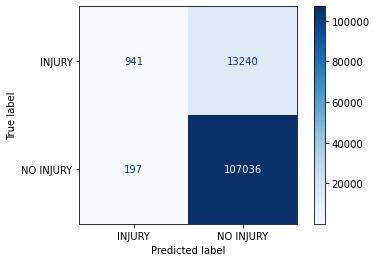

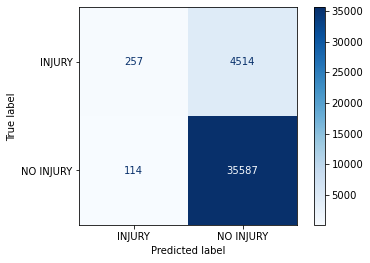

In [31]:
#XGBoost classifier - baseline/vanilla model
xgb = XGBClassifier()
target_names = ['No Injury', 'Injury']
run_model(X_train_df, X_test_df, y_train, y_test, xgb, target_names)

First we will take a look at which features the vanilla model are forecasting as important in predicting whether or not an accident will result in injury. 

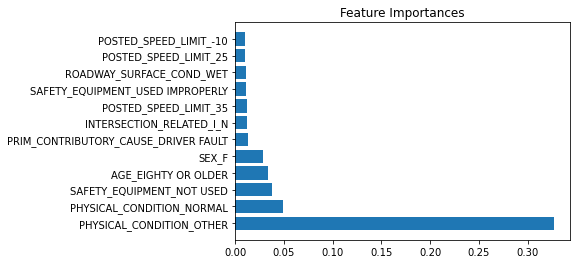

In [32]:
#Feature importances of baseline/vanilla xgb model
feature_importances(xgb, X_train_df)

It looks as though the physical condition of the driver is the most importance predictor, followed by the driver not using safety equipment, and then the sex of the driver.

Now, we will run a GridSearchCV in order to the identify optimal parameters for our data when using a XGBoost model.

[17:07:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:17] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:21] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:25] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:09:24] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:09:30] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:09:35] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:09:41] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:12:09] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:16] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:22] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:14:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:39] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:44] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:17:09] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:15] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:21] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:19:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:35] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:41] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:47] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:22:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:14] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:27] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

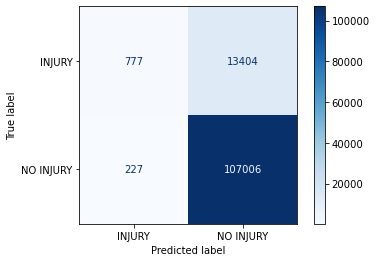

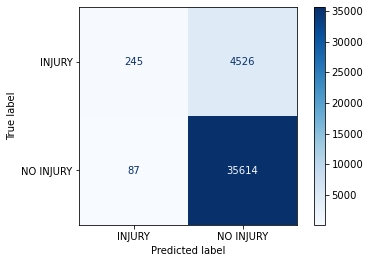

In [33]:
#XGBoost model with parameter grid
#parameter grid to use in Grid Search
param_grid = {'learning_rate': [0.1,0.2,0.3], 'max_depth':[5,6,7],
        'min_child_weight': [1,2], 'subsample': [0.5,0.7],
        'n_estimators': [100]}

#Grid Search object
xgb = XGBClassifier()
grid_clf = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=None, n_jobs=1)

#XGBoost model with parameter grid
run_model(X_train_df, X_test_df, y_train, y_test, grid_clf, target_names)

In [34]:
grid_clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

The best parameters identified during GridSearchCV are:<br>
* learning_rate = 0.1
* max_depth = 5
* min_child_weight = 1
* n_estimators = 100
* subsample = 0.7

The trainnig and testing scores changed negligibly between the vanilla and GridSearchCV models:<br>
* The training accuracy score decreased by slightly more than a thousanth of a point.<br>
* The testing accuracy score increased by slightly less than four ten-thousanths of a point.

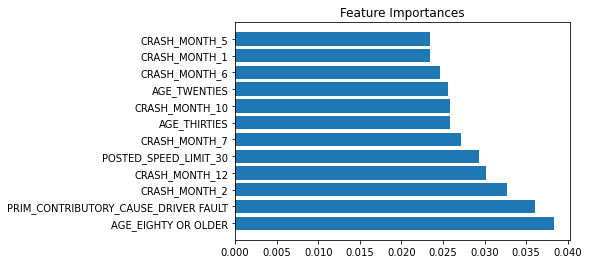

In [35]:
#Feature importances with non-SMOTE data on GridSearchCV xgb model
importance = model.best_estimator_.feature_importances_
columns = list(X_train_df.columns)
df = pd.DataFrame(columns=['Feature', 'Importance'])
df['Feature'] = columns
df['Importance'] = importance
df_sorted = df.sort_values(by='Importance', ascending=False)
top_features = df_sorted['Feature'][0:12]
top_importances = df_sorted['Importance'][0:12]

plt.barh(top_features, top_importances)
plt.title('Feature Importances')
plt.show()

The feature importances, however, changed drastically. The only feature to make both models is the driver being at fault in the accident.

Now we will apply SMOTE to address some of the Type II errors

In [36]:
#XGBoost model with SMOTE
xgb = XGBClassifier()
target_names = ['No Injury', 'Injury']

#parameter grid to use in Grid Search
param_grid = {'learning_rate': [0.1,0.2,0.3], 'max_depth':[5,6,7],
        'min_child_weight': [1,2], 'subsample': [0.5,0.7],
        'n_estimators': [100]}

#Grid Search object
grid_clf = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=None, n_jobs=1)

#SMOTE object to deal with imbalanced data
oversample = SMOTE(random_state=42)
X_train_smote, y_train_smote = oversample.fit_resample(X_train_ohe, y_train)

#fit model with SMOTE data
model = grid_clf.fit(X_train_smote, y_train_smote)

[17:35:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:36] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:39:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:23] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:33] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:43] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:44:10] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:21] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:32] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:43] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:48:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:30] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:40] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:49] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:53:09] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:31] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:42] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[17:57:24] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:33] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:43] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:53] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

[18:02:07] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:02:18] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:02:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:02:40] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

{'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.7}
              precision    recall  f1-score   support

   No Injury       0.79      0.06      0.11     14181
      Injury       0.89      1.00      0.94    107233

    accuracy                           0.89    121414
   macro avg       0.84      0.53      0.53    121414
weighted avg       0.88      0.89      0.84    121414

              precision    recall  f1-score   support

   No Injury       0.71      0.05      0.10      4771
      Injury       0.89      1.00      0.94     35701

    accuracy                           0.89     40472
   macro avg       0.80      0.53      0.52     40472
weighted avg       0.87      0.89      0.84     40472

Training Accuracy Score: 0.8883654273806975
Testing Accuracy Score: 0.8857728800158134


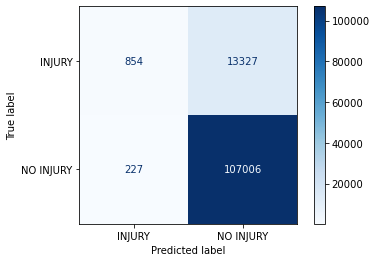

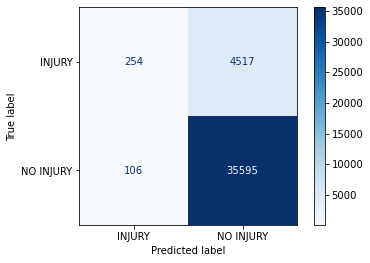

In [37]:
#print best params from fitted SMOTE data model
print(model.best_params_)

#make predictions on non-SMOTEd data
y_train_pred = model.predict(X_train_ohe)
y_test_pred = model.predict(X_test_ohe)

#print classification reports and confusion matrices
print(plot_confusion_matrix(model, X_train_ohe, y_train, cmap=plt.cm.Blues))
print(classification_report(y_train, y_train_pred, target_names=target_names))
print(plot_confusion_matrix(model, X_test_ohe, y_test, cmap=plt.cm.Blues))
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("Training Accuracy Score: {}".format(model.score(X_train_ohe, y_train)))
print("Testing Accuracy Score: {}".format(model.score(X_test_ohe, y_test)))

The best parameters identified during GridSearchCV with SMOTE data are:<br>
* learning_rate = 0.2
* max_depth = 7
* min_child_weight = 2
* n_estimators = 100
* subsample = 0.7

The training and testing scores changed negligibly between the GridSearchCV and the GridSearchCV with SMOTE data models:<br>
* The training accuracy score increased by slightly more than six ten-thousanths of a point.<br>
* The testing accuracy score decreased by slightly more than two ten-thousanths of a point.

Type II errors have gone down marginally. Although the metrics for the "No Injury" class are mediocre, we find this acceptable as we would prefer indiviuals to be classified as injured and subsequently be given the medical attention they need as opposed to injured individuals lacking treatment for being misclassified as uninjured. 

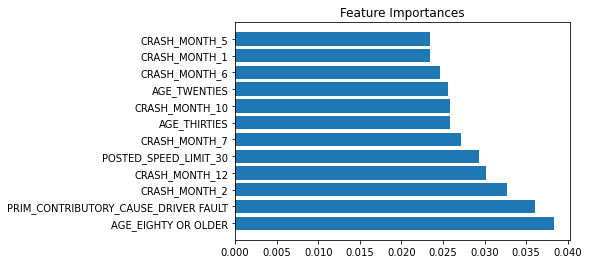

In [38]:
#Feature importances with SMOTE data
importance = model.best_estimator_.feature_importances_
columns = list(X_train_df.columns)
df = pd.DataFrame(columns=['Feature', 'Importance'])
df['Feature'] = columns
df['Importance'] = importance
df_sorted = df.sort_values(by='Importance', ascending=False)
top_features = df_sorted['Feature'][0:12]
top_importances = df_sorted['Importance'][0:12]

plt.barh(top_features, top_importances)
plt.title('Feature Importances')
plt.show()

Between the GridSearchCV and the GridSearchCV with SMOTE data models, the feature importances remained consistant.